In [1]:
!pip install pandapipes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 28.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.0 MB/s eta 0:00:00
  Created wheel for pandapipes: filename=pandapipes-0.10.0-py3-none-any.whl size=1461492 sha256=4ef5e327faebd134ac6be4039464485e662d708b72ce82013aa15b60aa8d2ced
  Stored in directory: /root/.cache/pip/wheels/a0/11/72/509866aaed7666c70de32de8c1a1829b63549295921bfa0781
  Created wheel for pandapower: filename=pandapower-2.14.11-py3-none-any.whl size=13131029 sha256=e0c7cd2dd40ef36e6384f3ace3f340831139ae77d36965e4522bf594ec68f96a
  Stored in directory: /root/.cache/pip/wheels/7f/de/5a/7b00f385eb06d1fb1f7c1cd06f9bb901709c038d3899548cf1
Successfully built pandapipes pandapower


In [2]:
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.0 MB/s eta 0:00:00


Junction Results:
   p_bar     t_k
0    1.0  273.15
1    1.0  283.15
2    1.0  293.15
3    1.0  303.15
4    1.0  313.15
5    1.0  323.15
6    1.0  333.15
7    1.0  343.15
8    1.0  353.15
Pipe Results:
   v_mean_m_per_s  p_from_bar  p_to_bar  t_from_k  t_to_k  mdot_from_kg_per_s  \
0             0.0         1.0       1.0    273.15  283.15                 0.0   
1             0.0         1.0       1.0    283.15  293.15                 0.0   
2             0.0         1.0       1.0    293.15  303.15                 0.0   
3             0.0         1.0       1.0    303.15  313.15                 0.0   
4             0.0         1.0       1.0    313.15  323.15                 0.0   
5             0.0         1.0       1.0    323.15  333.15                 0.0   
6             0.0         1.0       1.0    333.15  343.15                 0.0   
7             0.0         1.0       1.0    343.15  353.15                 0.0   

   mdot_to_kg_per_s  vdot_norm_m3_per_s  reynolds    lambda  
0     

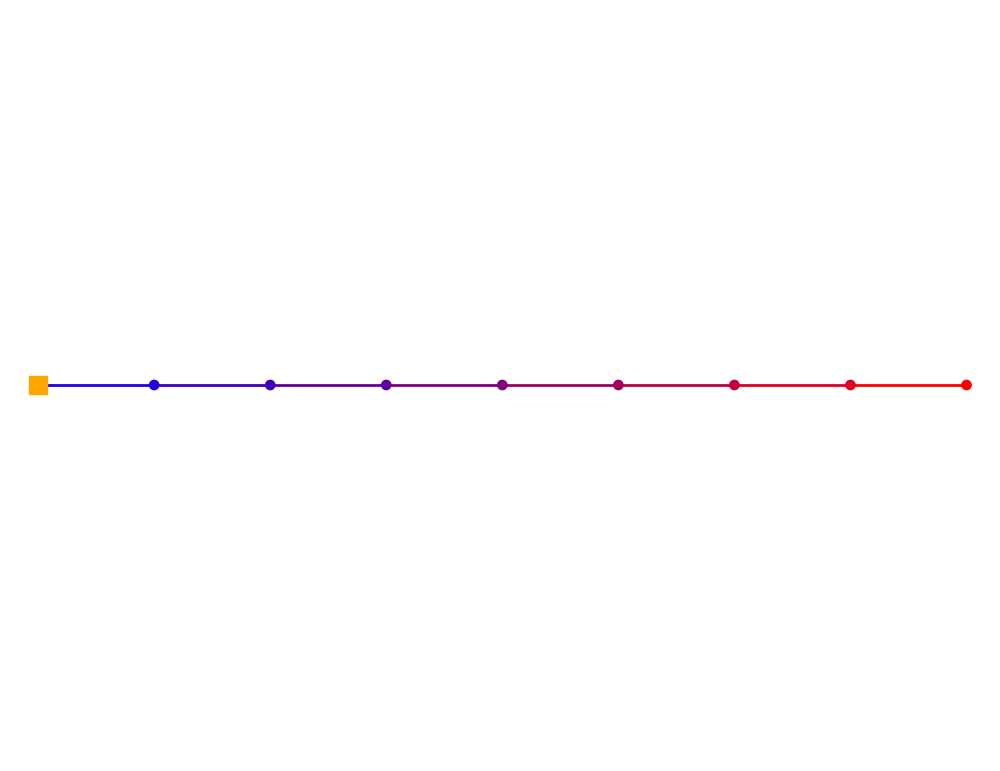

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandapipes as pp
import pandapipes.plotting as plot
import matplotlib.colors as mcolors
from colormaps import cmap_continuous

# Create a new pandapipes network
net = pp.create_empty_network(fluid="water")

# Create Junctions with varying temperatures
j1 = pp.create_junction(net, pn_bar=1, tfluid_k=273.15, name="Junction 1 (0°C)")
j2 = pp.create_junction(net, pn_bar=1, tfluid_k=283.15, name="Junction 2 (10°C)")
j3 = pp.create_junction(net, pn_bar=1, tfluid_k=293.15, name="Junction 3 (20°C)")
j4 = pp.create_junction(net, pn_bar=1, tfluid_k=303.15, name="Junction 4 (30°C)")
j5 = pp.create_junction(net, pn_bar=1, tfluid_k=313.15, name="Junction 5 (40°C)")
j6 = pp.create_junction(net, pn_bar=1, tfluid_k=323.15, name="Junction 6 (50°C)")
j7 = pp.create_junction(net, pn_bar=1, tfluid_k=333.15, name="Junction 7 (60°C)")
j8 = pp.create_junction(net, pn_bar=1, tfluid_k=343.15, name="Junction 8 (70°C)")
j9 = pp.create_junction(net, pn_bar=1, tfluid_k=353.15, name="Junction 9 (80°C)")

# Create Pipes to connect the junctions
pp.create_pipe_from_parameters(net, from_junction=j1, to_junction=j2, length_km=0.5, diameter_m=0.1, name="Pipe 1-2")
pp.create_pipe_from_parameters(net, from_junction=j2, to_junction=j3, length_km=0.5, diameter_m=0.1, name="Pipe 2-3")
pp.create_pipe_from_parameters(net, from_junction=j3, to_junction=j4, length_km=0.5, diameter_m=0.1, name="Pipe 3-4")
pp.create_pipe_from_parameters(net, from_junction=j4, to_junction=j5, length_km=0.5, diameter_m=0.1, name="Pipe 4-5")
pp.create_pipe_from_parameters(net, from_junction=j5, to_junction=j6, length_km=0.5, diameter_m=0.1, name="Pipe 5-6")
pp.create_pipe_from_parameters(net, from_junction=j6, to_junction=j7, length_km=0.5, diameter_m=0.1, name="Pipe 6-7")
pp.create_pipe_from_parameters(net, from_junction=j7, to_junction=j8, length_km=0.5, diameter_m=0.1, name="Pipe 7-8")
pp.create_pipe_from_parameters(net, from_junction=j8, to_junction=j9, length_km=0.5, diameter_m=0.1, name="Pipe 8-9")

# External grid at the source junction to simulate external pressure and temperature conditions
pp.create_ext_grid(net, junction=j1, p_bar=1, t_k=273.15, name="External Grid")

# Run the pipeline calculation with increased iterations and relaxed tolerance
pp.pipeflow(net, iter=100, tol_p=1e-5, tol_v=1e-5)

# Output the results for junctions
print("Junction Results:")
print(net.res_junction)

# Output the results for pipes
print("Pipe Results:")
print(net.res_pipe)

# Preprocess temperature data to get colors for junctions
temperatures = net.res_junction.t_k.values

# Use custom colormap function
cmap, norm = cmap_continuous([(273.15, "blue"), (353.15, "red")])
junction_colors = [mcolors.rgb2hex(cmap(norm(temp))) for temp in temperatures]

# Get the temperature data for pipes (t_to_k from pipe results)
pipe_temperatures = net.res_pipe.t_to_k.values
pipe_colors = [mcolors.rgb2hex(cmap(norm(temp))) for temp in pipe_temperatures]

# Create a pipe collection with temperature-based coloring
pipe_collection = plot.create_pipe_collection(
    net,
    use_junction_geodata=False,
    color=pipe_colors,  # Apply colors directly based on temperature
)

# Now, pass the colors directly to simple_plot
plot.simple_plot(
    net,
    pipe_color=pipe_colors,  # Pass the custom pipe colors here
    plot_sinks=True,
    plot_sources=True,
    plot_ext_grids=True,
    junction_color=junction_colors,
)

plt.show()


In [ ]:
print(temperatures)

[273.15 283.15 293.15 303.15 313.15 323.15 333.15 343.15 353.15]


In [ ]:
net.pipe_geodata

,coords


In [ ]:
net.junction_geodata

,x,y
0,0.0,0.0
1,1.0,0.0
2,2.0,0.0
3,3.0,0.0
4,4.0,0.0
5,5.0,0.0
6,6.0,0.0
7,7.0,0.0
8,8.0,0.0
